In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
url_train = 'https://raw.githubusercontent.com/Vijesh0405/DatasetML/main/TaxiFare%20(2)%20(1)%20(1).csv'
url_test = 'https://raw.githubusercontent.com/Vijesh0405/DatasetML/main/test.csv'

In [6]:

train = pd.read_csv(url_train)
test = pd.read_csv(url_test)


In [7]:
train=train.dropna()
test = test.dropna()
train.describe()


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
train.head(7)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1


In [9]:
train.shape

(50000, 8)

In [10]:
# This is the helper function that i created to filter according to test dataset.

def remove_outliers(df):
    return df[(df['amount'] >= 1.) &
              (df['amount'] <= 500.) &
              (df['longitude_of_pickup'] >= -75) &
              (df['longitude_of_pickup'] <= -72) &
              (df['longitude_of_dropoff'] >= -75) &
              (df['longitude_of_dropoff'] <= -72) &
              (df['latitude_of_pickup'] >= 40) &
              (df['latitude_of_pickup'] <= 42) &
              (df['latitude_of_dropoff'] >=40) &
              (df['latitude_of_dropoff'] <= 42) &
              (df['no_of_passenger'] >= 1) &
              (df['no_of_passenger'] <= 6)]

In [11]:
train = remove_outliers(train)
train.shape

(48785, 8)

In [12]:
# This function return distance calcuated from 4 points
def haversine_np(lon1, lat1, lon2, lat2):

    """Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length."""

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [13]:
train['trip_distance'] = haversine_np(train['longitude_of_pickup'], train['latitude_of_pickup'], train['longitude_of_dropoff'], train['latitude_of_dropoff'])
test['trip_distance'] = haversine_np(test['longitude_of_pickup'], test['latitude_of_pickup'], test['longitude_of_dropoff'], test['latitude_of_dropoff'])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             48785 non-null  object 
 1   amount                48785 non-null  float64
 2   date_time_of_pickup   48785 non-null  object 
 3   longitude_of_pickup   48785 non-null  float64
 4   latitude_of_pickup    48785 non-null  float64
 5   longitude_of_dropoff  48785 non-null  float64
 6   latitude_of_dropoff   48785 non-null  float64
 7   no_of_passenger       48785 non-null  int64  
 8   trip_distance         48785 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.7+ MB


In [15]:
train.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,trip_distance
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030117
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.444828
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.388653
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.797513
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.997902


In [16]:
test.head()

,key,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,trip_distance
0,08:24.0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2.321801
1,08:24.0,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2.423830
2,53:44.0,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.618239
3,12:12.0,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.959801
4,12:12.0,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,5.383919


In [17]:
# helper function to extract useful info from any datetime column for ML
def extract_from_date(df):
    import datetime
    for col in df.columns:
        if 'date' in col:
            if isinstance(df[col].iloc[0], pd.Timestamp):
                df['year'] = df[col].dt.year
                df['month'] = df[col].dt.month
                df['day'] = df[col].dt.day
                df['day_of_week']=df[col].dt.dayofweek
                df['week_of_year'] = df[col].dt.isocalendar().week
                df['week_of_year'] = df['week_of_year'].astype(int)
                df['hour'] = df[col].dt.hour
            else:
                df[col] = pd.to_datetime(df[col])-datetime.timedelta(hours=4)  #adjusting for the timezone
                df[col] = df[col].dt.tz_localize(None)
                df['year'] = df[col].dt.year
                df['month'] = df[col].dt.month
                df['day'] = df[col].dt.day
                df['day_of_week']=df[col].dt.dayofweek
                df['week_of_year'] = df[col].dt.isocalendar().week
                df['week_of_year'] = df['week_of_year'].astype(int)
                df['hour'] = df[col].dt.hour;

In [18]:
extract_from_date(train)

In [19]:
extract_from_date(test)

In [20]:
train.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,trip_distance,year,month,day,day_of_week,week_of_year,hour
0,26:21.0,4.5,2009-06-15 13:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030117,2009,6,15,0,25,13
1,52:16.0,16.9,2010-01-05 12:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.444828,2010,1,5,1,1,12
2,35:00.0,5.7,2011-08-17 20:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.388653,2011,8,17,2,33,20
3,30:42.0,7.7,2012-04-21 00:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.797513,2012,4,21,5,16,0
4,51:00.0,5.3,2010-03-09 03:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.997902,2010,3,9,1,10,3


In [21]:
test.head()

,key,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,trip_distance,year,month,day,day_of_week,week_of_year,hour
0,08:24.0,2015-01-27 09:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.321801,2015,1,27,1,5,9
1,08:24.0,2015-01-27 09:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.423830,2015,1,27,1,5,9
2,53:44.0,2011-10-08 07:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618239,2011,10,8,5,40,7
3,12:12.0,2012-12-01 17:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.959801,2012,12,1,5,48,17
4,12:12.0,2012-12-01 17:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.383919,2012,12,1,5,48,17


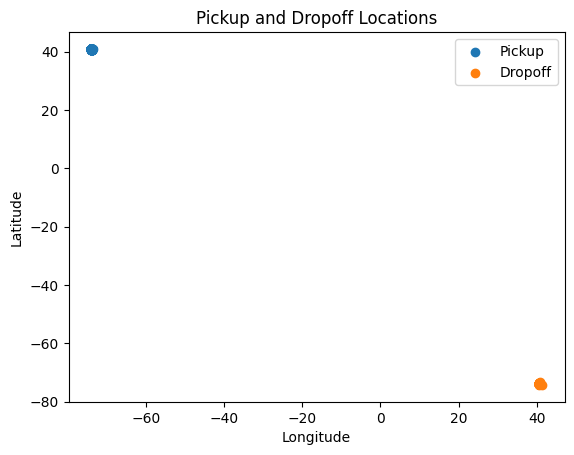

In [22]:
sampled_data = train.sample(n=1000)  # Adjust the sample size as needed
plt.scatter(sampled_data['longitude_of_pickup'], sampled_data['latitude_of_pickup'], label='Pickup')
plt.scatter(sampled_data['latitude_of_dropoff'], sampled_data['longitude_of_dropoff'], label='Dropoff')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup and Dropoff Locations')
plt.legend()
plt.show()

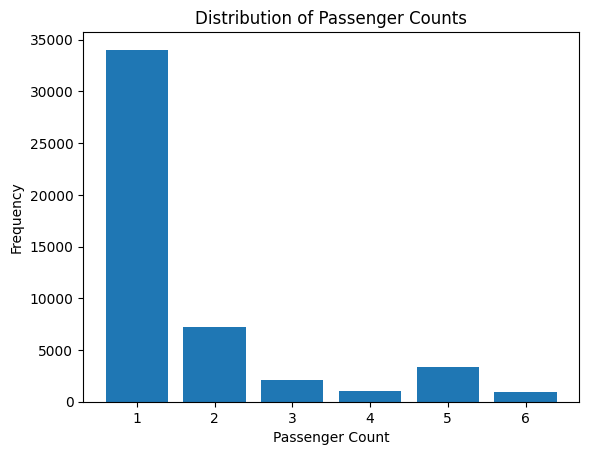

In [23]:
passenger_counts = train['no_of_passenger'].value_counts()
plt.bar(passenger_counts.index, passenger_counts.values)
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Counts')
plt.show()


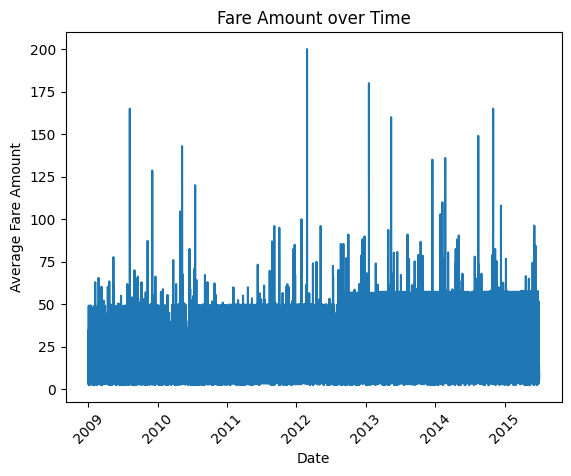

In [24]:
fare_over_time = train.groupby('date_time_of_pickup')['amount'].mean()

plt.plot(fare_over_time.index, fare_over_time.values)
plt.xlabel('Date')
plt.ylabel('Average Fare Amount')
plt.title('Fare Amount over Time')
plt.xticks(rotation=45)
plt.show()

In [25]:
train.to_parquet('train.parquet')
test.to_parquet('test.parquet')

In [26]:
train.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'trip_distance', 'year', 'month', 'day',
       'day_of_week', 'week_of_year', 'hour'],
      dtype='object')

In [27]:
input_cols = ['longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'trip_distance', 'year', 'month', 'day',
       'day_of_week', 'week_of_year', 'hour']
target_col = ['amount']

In [28]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train, test_size=0.2, random_state=42)

In [29]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]
test_inputs = test[input_cols]


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
model.fit(train_inputs, train_targets)

LinearRegression()

In [32]:
# now try test.csv on our model
test_preds = model.predict(test_inputs)

In [33]:
sub_df = pd.DataFrame(test_preds, columns = ['Fare_amount'])

In [34]:
sub_df.head()

,Fare_amount
0,10.855763
1,11.703333
2,6.299387
3,8.398231
4,14.535176
